# Introduction

When we talk about clustering, we often talk about the concept of 'unsupervised learning' method, that also brings up the concept of ‘supervised learning’ method. 

When we talk about supervised machine learning, it is when there is a defined relationship between the independent and dependent variables of X and Y respectively. If it is for numerical inputs, it is regression and if it is for a class variable, then it is classification. 

However, data is never straightforward and there are often instances wherein there is no relationship between the each of the variables. During those instances, employing the un-supervised learning method is the best choice. Clustering, is an unsupervised learning technique that looks for data with no labels, and discovers clusters or groups when there is similarity between the data points. This helps in understanding the internal structure of the data and to understand the patterns within the dataset.  In the economic dataset, that contains the fiscal and monetary data of BRICS nations, clustering could be useful to understand if there are well-defining indicators that highlight the performance of each nation, let’s say in terms of GDP. For instance, if a set of features are clustering together, it means there are some features that are well-defined to those specific instances.  If certain variables are clustering, it means that maybe there is some sort of information that could be explored to ethically understand the contribution of factors. 



# Theory

## K-Means Clustering 

K-means clustering is one of the unsupervised learning techniques that is used to group the data into distinct clusters without any fixed mapping between the dependant and the independent variables. The primary goal is to partition the dataset into K clusters (by choosing the optimal number of clusters) where each clusters is defined by the centroid. Since K-means uses Euclidean distance to define each cluster on basis of its centroid. For K-means, choosing the optimal number of clusters K is important to run for a range of K values whilst plotting the sum of squared distances between the data points and their centroids, if done through the elbow method. Another way to find optimal clusters is through the silhouette scores which is a metric that is used as an evaluation metrics for clustering. Ranging between -1 to 1, we try to use that score as a metric to find the optimal clustering size where each data point in the defined k range is computed taking into account the intra and inter cluster relationships and the average silhouette score is calculated and plotted. It is visualised using the scree plot to see how the values change with K.

Although K-means is computationally efficient for larger datasets, it assumed the circular clusters that are equally sized, that doesn’t really consider the complex data points. Another disadvantage is how the much of the performance of the model is dependent on k cluster values.

## DBSCAN Clustering

DBSCAN, also called as Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is one of the clustering algorithms that tries to look into the density of data points with specific radius to segregate the outliers, the outside and the inside points. There are three main points for DBSCAN, with core points, border points and the outliers.

1. Core points: The core points are those that have a defined number of minimum samples within a defined radius (referred to as epsilon)
2. Border points: The border points are those that are not core points but loiter somewhere around. 
3. Outliers: These points are those that are not core points, nor are they closer to the core points. They are often referred to as the noise.

For DBSCAN, the optimal performance is based on the epsilon value and the number of neighbours the clustering is looking for. Although unlike K-means, we don’t need to pre-specify the number of clusters but we need to find the optimal point. The silhouette score is a good method of evaluation. One of the methods that I have used is to iterate over all possible combinations of eps and min_samples values that gives me the maximum silhouette scores. 

One of the interesting parts that I liked about DBSCAN is how robust it is to outliers and can handle complex datasets but it is extremely sensitive to the choice of eps and min_sample values.


## Hierarchial Clustering 

The hierarchical clustering creates a tree of clusters as a dendrogram, that is hierarchical in nature to represent the relationships between the data points in depth. This is a helpful clustering technique as we can rely on visualisation to make sense of the clusters. For hierarchical clustering usually, each point is initially assumed to be a single and independent cluster. Based on the linkage method, the closest clusters are merged together (we used Ward) and on basis of that the dendrogram is formed until a specified number of clusters is reached. 

The optimal choice for the clusters is a trial and error on basis of what is preferred by the person. For the project, the a bigger cluster size was defined and was pre-defined according to the requirements. 

One of the hierarchical clustering techniques that I have done is the Agglomerative clustering that follows a bottoms-up approach to build a hierarchy of clusters that follows the exact method of hierarchical clustering.

# Methods 

#### Libraries

In [13]:
# Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


As my data consists of a self-defined variable X and Y, we see that for clustering, the dependant variable or Y variable has to be dropped. 

In [14]:
stackeddf= pd.read_csv("../data/stackeddf.csv")

stackeddf.head(10)
y = stackeddf['labels']
x = stackeddf.drop(['labels'], axis=1)
x1 = x.drop(['year'], axis=1)


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


## K-Means

### Optimal K-Means : Elbow Method 

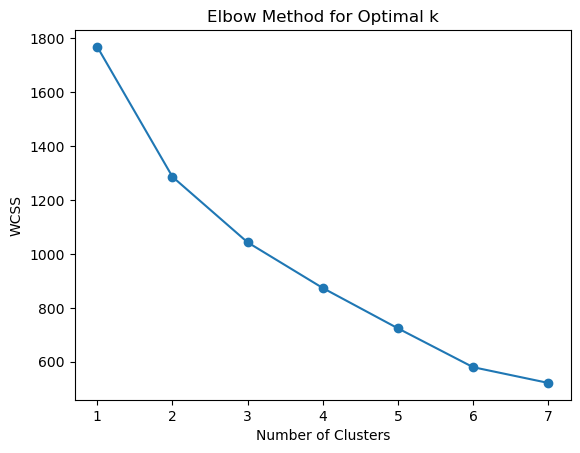

In [15]:
# to ignore future warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.cluster._kmeans")


# optimal clustering using the elbow method
wcss = [] 
for i in range(1, 8): 
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x) 
    wcss.append(kmeans.inertia_)

# Plotting the WCSS values
plt.plot(range(1, 8), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') 
plt.show()

In the code above, to avoid the warnings, the warnings module has been used. For k-means clustering, finding the optimal amount of clustering is important for better interpretability, higher performance and for informed decision making. The elbow method is used to find the optimal amount of clusters 'K'. It uses the WCSS (Within-Cluster Sum of Square), what is calculated using the distance between the points of the cluster centroid and the points of the cluster. So a loop has been created where for each value of k between 1 and 20, we calculate the WCSS amd plot it that resembles an Elbow. As the clusters increase, the WCSS value decreses. The optimal k value is the change in the shape of the point. The optimal amount of cluster here is 6. 

### Optimal K-Means : Silhoutte Score Method 

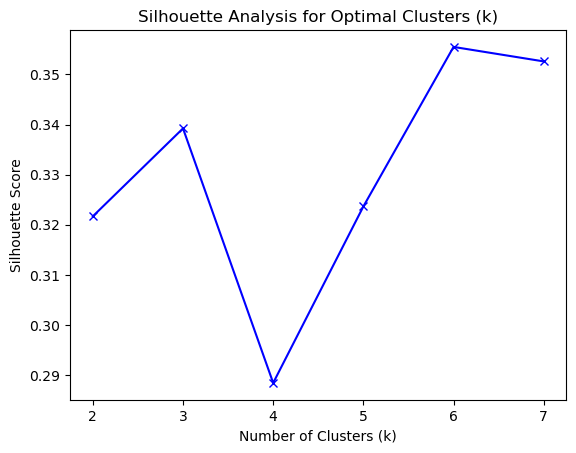

Optimal Number of Clusters: 6


In [16]:
# silhoutte score to find optimal k clusters

range_clusters = range(2, 8)

silhoutte = []

for n in range_clusters:
    kmeans = KMeans(n_clusters=n, random_state=2339)
    kmeans.fit(x)
    cluster_labels = kmeans.labels_
    silhoutte.append(silhouette_score(x, cluster_labels))

# plotting
plt.plot(range_clusters, silhoutte, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal Clusters (k)')
plt.show()

optimal_clusters = range_clusters[np.argmax(silhoutte)]
print(f"Optimal Number of Clusters: {optimal_clusters}")

Finding the optimal k clusters can also be done through the silhouette score method that quantifies how similar the data point is within a cluster, referred to as 'cohesion' in comparison to the other clusters called 'separation'. 

The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation). In the code above, within the self-defined range of k, we calculate the silhouette scors for each iteration and try to find an optimal k that gives the maximum silhoutte scores. As it ranges between -1 and +1, a higher silhoutte scores' optimal cluster is chosen since it showcases more distinct and well-defined clusters space. Through this as well, we see that optimal k value is 6.

### Optimal K-Value Clustering 

#### Without Feature Extraction

In [17]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=2339)
optimal_kmeans = kmeans.fit_predict(x)
optimal_kmeans[0:15]

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3], dtype=int32)

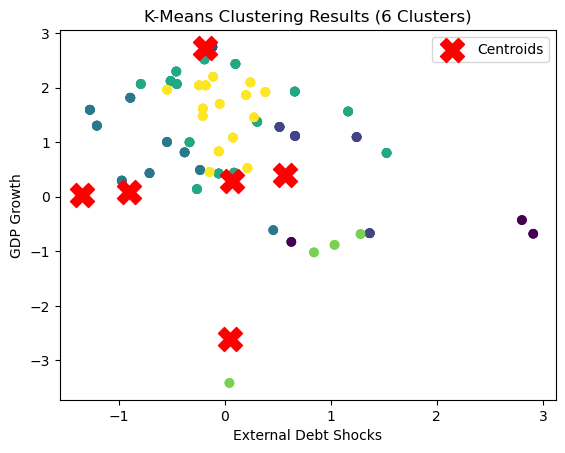

In [18]:

plt.scatter(x['ex_debt_shocks'], x['gdp_growth'], c=optimal_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, marker='X', c='red', label='Centroids')
plt.title('K-Means Clustering Results (6 Clusters)')
plt.xlabel('External Debt Shocks')
plt.ylabel('GDP Growth')
plt.legend()
plt.show()

One of my questions that I wanted to ask was about relationship between External Debt Shocks and the GDP growth. External debt shocks and GDP growth have a complex relationship that is influenced by debt levels, composition, and terms, as well as external factors and policy responses. High and unsustainable debt can stifle economic progress, and the mix of concessional and commercial loans influences the outcome. Debt terms, foreign shocks, and a country's policy reaction are all important considerations. Global economic conditions and country-specific factors such as governance and political stability add to the complexities of this relationship. Hence, one of the ways in which without the influence mapping between the dependant and independant variable, I wanted to find out relationship between External Debt Shocks and GDP Growth. It is seen that there is clustering where certain clusters being exclusive but most clusters overlapping and non-exclusive in nature. Two clusters are properly created, whereas the other two aren't. 


/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


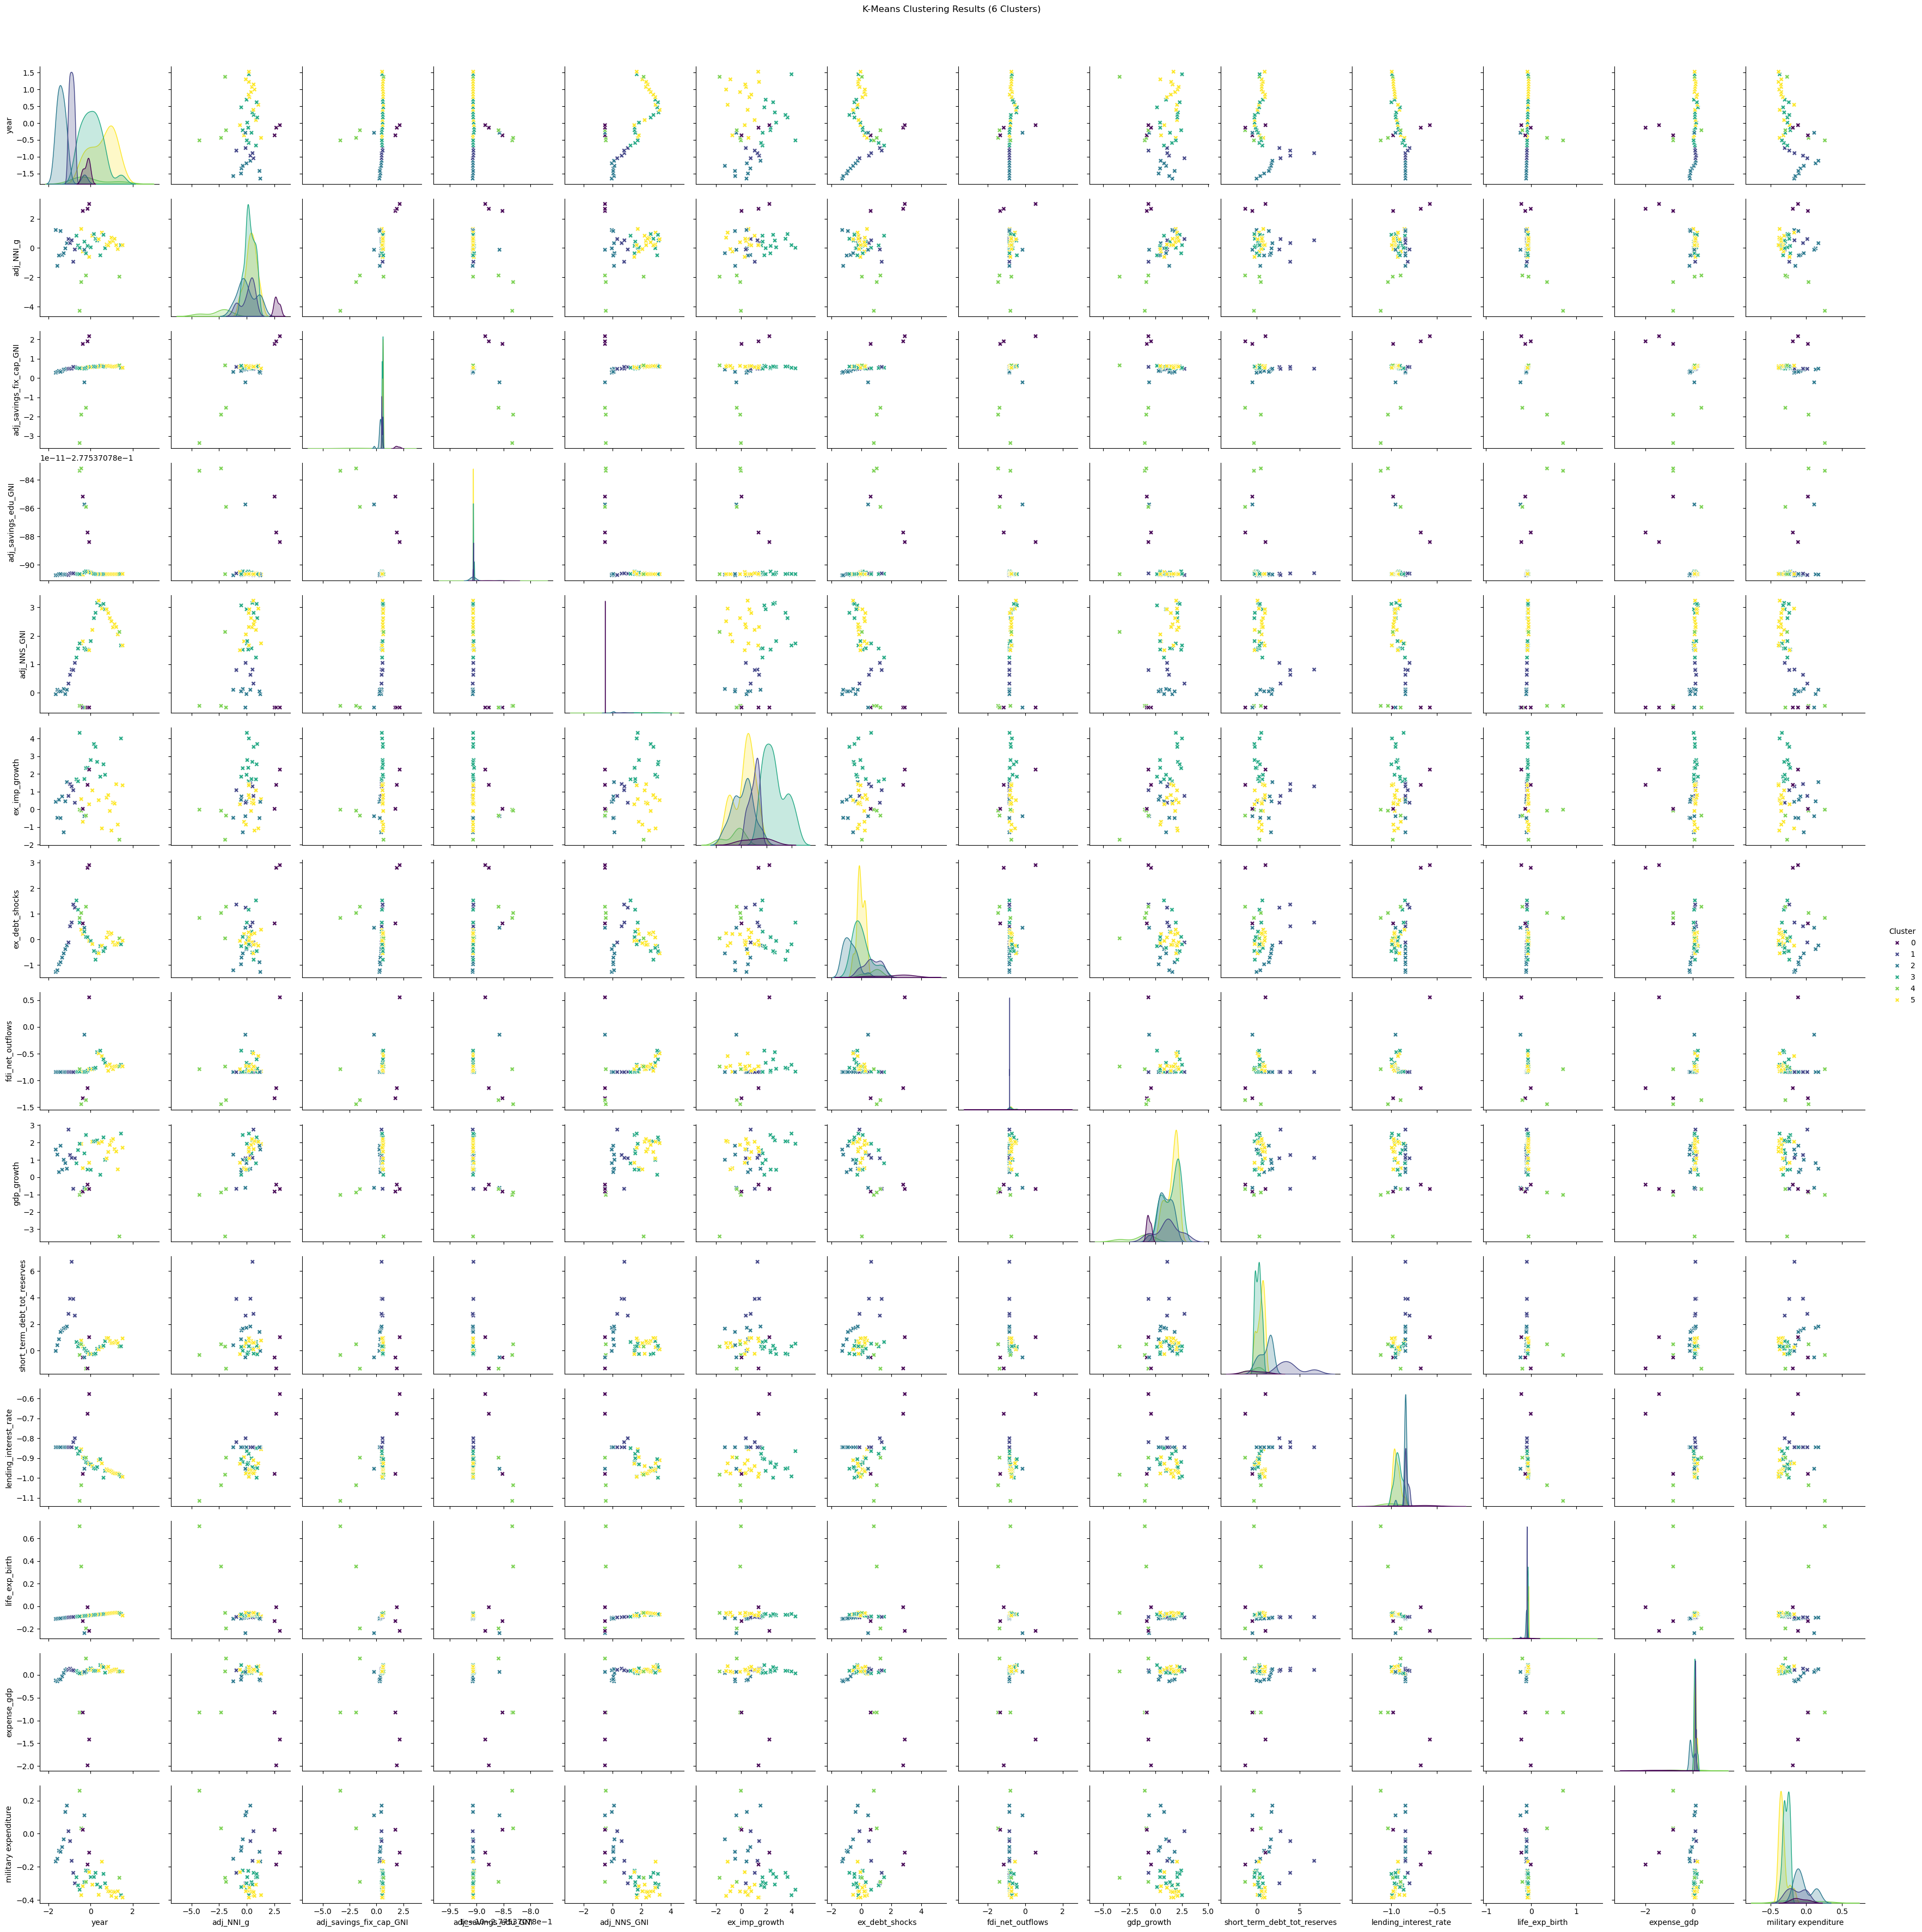

In [19]:

x['Cluster'] = optimal_kmeans

sns.pairplot(x, hue='Cluster', palette='viridis', markers='X')
plt.suptitle('K-Means Clustering Results (6 Clusters)', y=1.02)
plt.show()

If you look at the overall relationships of all the variables with one another, this also gives us an interesting plot to look at. For instance, Military Spending is an interesting component for me to look at since you can see visual relationships with other monetary and fiscal data points.

### With Feature Extraction

Feature Extraction is one of the important components for well-defined and better performing clusters, hence an attempt is made to see if they actually help. PCA and t-SNE are both used to see if they capture the linear and non-linear aspects of the data well. 


In [20]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# before pca 

k_means_before = KMeans(n_clusters=6, random_state=42)
optimal_kmeans_before = k_means_before.fit_predict(x)

# after pca 
pca = PCA(n_components=4)
optimal_pca_kmeans = pca.fit_transform(x)

kmeans_after_pca = KMeans(n_clusters=6, random_state=42)
labels_after_pca = kmeans_after_pca.fit_predict(optimal_pca_kmeans)


# after tsne 

tsne = TSNE(n_components=3, perplexity=2, random_state=42)
optima_tsne_kmeans = tsne.fit_transform(x)

kmeans_after_tsne = KMeans(n_clusters=6, random_state=42)
labels_after_tsne = kmeans_after_pca.fit_predict(optima_tsne_kmeans)


silhouette_score_before_pca = silhouette_score(x, optimal_kmeans_before)
print(f"Silhouette Score before PCA: {silhouette_score_before_pca:.4f}")

silhouette_score_after_pca = silhouette_score(optimal_pca_kmeans, labels_after_pca)
print(f"Silhouette Score after PCA: {silhouette_score_after_pca:.4f}")

silhouette_score_after_tsne = silhouette_score(optima_tsne_kmeans, labels_after_tsne)
print(f"Silhouette Score after TSNE: {silhouette_score_after_tsne:.4f}")



Silhouette Score before PCA: 0.4454
Silhouette Score after PCA: 0.4803
Silhouette Score after TSNE: 0.2795


The silhouette score whilst doing the K-means clustering is better after PCA than before, thus capturing the dimensionality in the data and giving better clusters.

In [21]:

col = ('gdp_growth', 'ex_debt_shocks')
indices = [x.columns.get_loc(c) for c in col]
print(f"The indices of the columns {col} are: {indices}")


The indices of the columns ('gdp_growth', 'ex_debt_shocks') are: [8, 6]


I'm trying to find the indices so that I can compare the exact values for clustering before and after pca

In [22]:
evr = pca.explained_variance_ratio_
cev = np.cumsum(evr)

print("Explained Variance Ratio for Each Component:")
print(evr*100)


Explained Variance Ratio for Each Component:
[37.66203489 22.03607405 14.10907775  9.93647105]


We see that explained variance ratio is better for PCA 1 and PCA 2 for the dataset. 

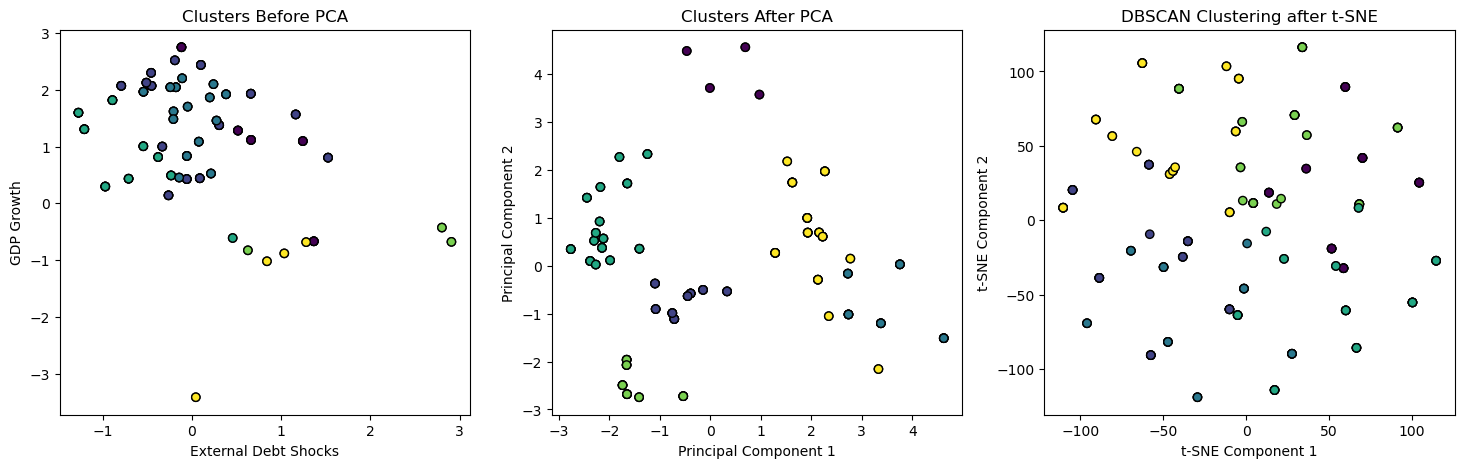

In [23]:


# Visualize clusters before PCA
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.scatter(x['ex_debt_shocks'], x['gdp_growth'], c=optimal_kmeans_before, cmap='viridis', edgecolor='k')
plt.title('Clusters Before PCA')
plt.xlabel('External Debt Shocks')
plt.ylabel('GDP Growth')

# Visualize clusters after PCA
plt.subplot(1, 3, 2)
plt.scatter(optimal_pca_kmeans[:, 0], optimal_pca_kmeans[:, 1], c=labels_after_pca, cmap='viridis', edgecolor='k')
plt.title('Clusters After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Visualise clusters after t-SNE
plt.subplot(1, 3, 3)
plt.scatter(optima_tsne_kmeans[:, 0], optima_tsne_kmeans[:, 1], c=labels_after_tsne, cmap='viridis', edgecolor='k')
plt.title('DBSCAN Clustering after t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.show()



Here, the problem is, we cannot technically explain the data as before PCA, just clustering in general can give you general information about clustering in terms of 2D data points. We cannot visually compare all the three as the way all three work is completely different. If you look at t-SNE, you see that the data is completely scattered everywhere but for PCA, you see that it does form clustering. The above is just for visual purposes and cannot be used on a comparable scale. For looking into PCA, we can use the biplot

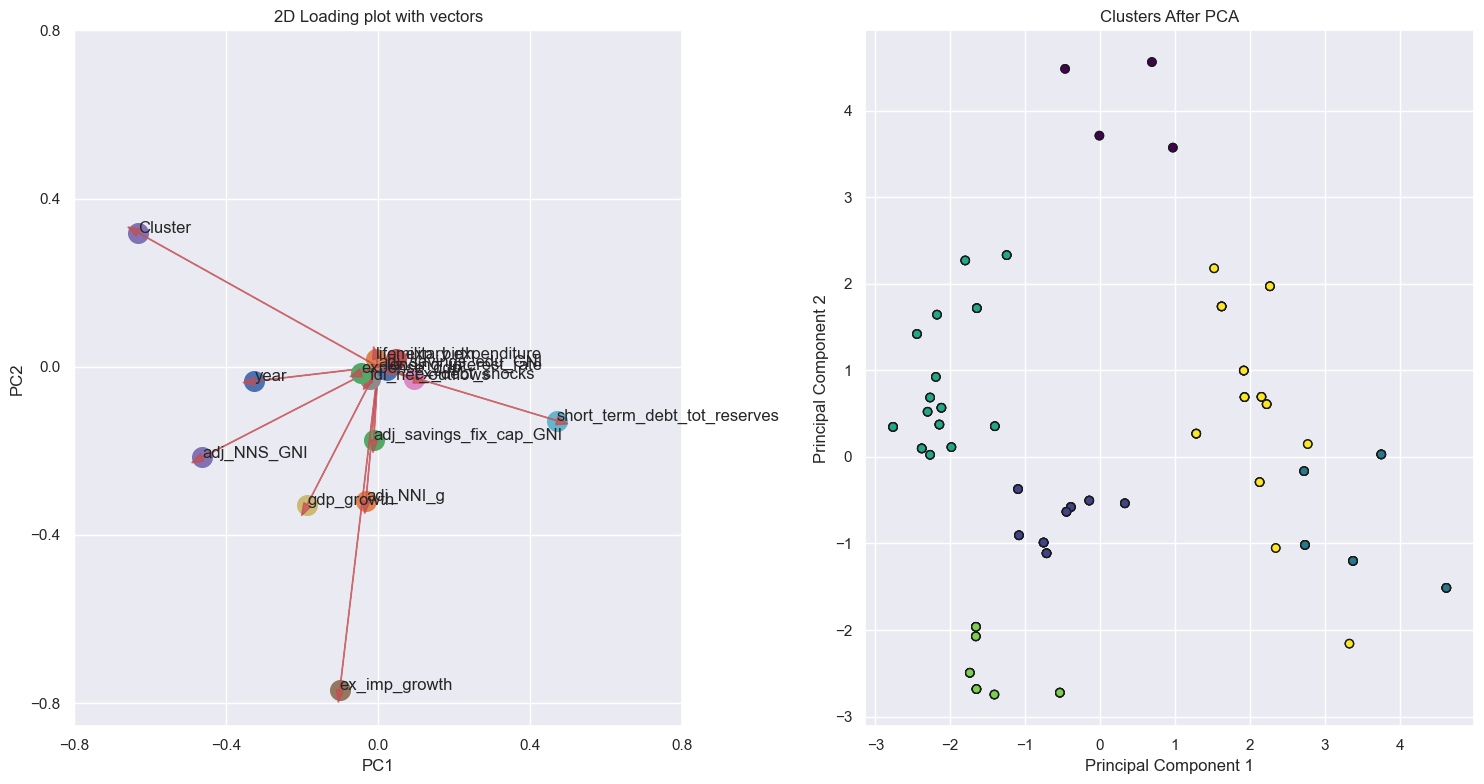

In [40]:
# using the biplot
pca = PCA(n_components=6)
pca_features = pca.fit_transform(x)
loadings = pca.components_
n_features = pca.n_features_in_
feature_names = x.columns
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
pc_loadings = dict(zip(pc_list, loadings))
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
sns.set()
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
xs = loadings[0]
ys = loadings[1]
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, xs[i], ys[i],
        color='r', head_width=0.02, alpha=0.75
    )
    plt.text(xs[i], ys[i], varnames)
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D Loading plot with vectors')
plt.subplot(1, 2, 2)
plt.scatter(optimal_pca_kmeans[:, 0], optimal_pca_kmeans[:, 1], c=labels_after_pca, cmap='viridis', edgecolor='k')
plt.title('Clusters After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()


This biplot gives us a better information about how the PCA has taken into the data. We see that 'Ajusted Net National Income' has been captured more by PC2 and 'Export Import Growth' has been captured more by PC1. This also gives us information that the variables that are further deviated from the cluster of data points shown on the left side of the graph. This is an interesting plot to work on and will study about it in depth.

## DBSCAN

### Optimal Parameter Tuning

In [26]:
#for eps in [i/10 for i in range(4, 14)]:
    #for min_samples in range(4, 12):
        #print("\neps={}".format(eps))
        #print("min_samples={}".format(min_samples))
        
        # Apply DBSCAN
        #dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        #labels = dbscan.fit_predict(x)
        
        # Check if there is only one unique label
        #if len(np.unique(labels)) == 1:
            #print("Only one cluster found.")
        #else:
            # Calculate Silhouette Score
            #silh = silhouette_score(x, labels)

            # Print cluster information
            #print("Clusters present: {}".format(np.unique(labels)))
            #print("Cluster sizes: {}".format(np.bincount(labels + 1)))
            #print("Silhouette Score: {}".format(silh*100))

This is the code I had worked on during one of the customer segmentation projects from real life KPMG dataset that tries to segment customers on basis of their consumption patterns during the RFM analysis. Within a defined range of parameters (eps and minimum samples), it find the optimal values that give the best solution. In this, we see that, with eps of 1.2 and minimum samples of 4, the silhouette score is around 53%.

### Optimal DBSCAN Clustering 

In [27]:
dbscan_optimal = DBSCAN(eps=1.2, min_samples=4)
labels_optimal_dbscan = dbscan_optimal.fit_predict(x)

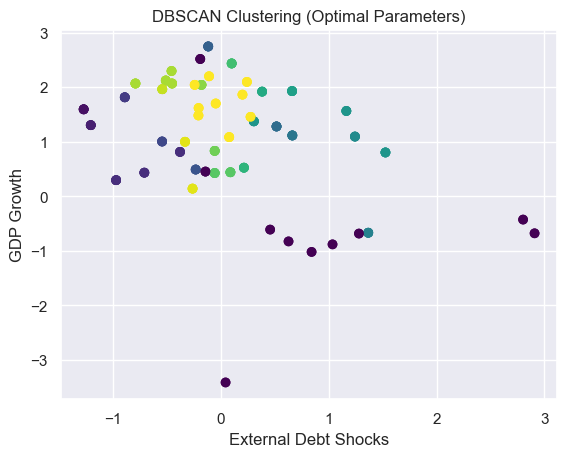

In [28]:
plt.scatter(x['ex_debt_shocks'], x['gdp_growth'], c=labels_optimal_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering (Optimal Parameters)')
plt.xlabel('External Debt Shocks')
plt.ylabel('GDP Growth')
plt.show()

### With Feature Extraction

In [29]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing this for 3D scatter plot
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Before PCA
dbscan_optimal = DBSCAN(eps=1.2, min_samples=4)
labels_optimal_dbscan = dbscan_optimal.fit_predict(x)

# After PCA
pca1 = PCA(n_components=4)
optimal_pca_kmeans1 = pca1.fit_transform(x)

dbscan_optimal_after_pca = DBSCAN(eps=1.2, min_samples=4)
labels_optimal_dbscan_pca = dbscan_optimal_after_pca.fit_predict(optimal_pca_kmeans1)

# After t-SNE
tsne = TSNE(n_components=3, perplexity=2, random_state=42)
optima_tsne_kmeans2 = tsne.fit_transform(x)

dbscan_optimal_after_tsne = DBSCAN(eps=1.2, min_samples=4)
labels_optimal_dbscan_tsne = dbscan_optimal_after_tsne.fit_predict(optima_tsne_kmeans2)


In [30]:

# Silhouette scores
silhouette_score_before_pca = silhouette_score(x, labels_optimal_dbscan)
print(f"Silhouette Score before PCA: {silhouette_score_before_pca:.4f}") 

silhouette_score_after_pca = silhouette_score(optimal_pca_kmeans1, labels_optimal_dbscan_pca)
print(f"Silhouette Score after PCA: {silhouette_score_after_pca:.4f}")

silhouette_score_after_tsne = silhouette_score(optima_tsne_kmeans2, labels_optimal_dbscan_tsne)
print(f"Silhouette Score after TSNE: {silhouette_score_after_tsne:.4f}")



Silhouette Score before PCA: 0.5856
Silhouette Score after PCA: 0.5121
Silhouette Score after TSNE: 0.6255


In [31]:
evr1 = pca1.explained_variance_ratio_
print("Explained Variance Ratio for Each Component:")
print(evr1*100)

x.columns

Explained Variance Ratio for Each Component:
[37.66203489 22.03607405 14.10907775  9.93647105]


Index(['year', 'adj_NNI_g', 'adj_savings_fix_cap_GNI', 'adj_savings_edu_GNI',
       'adj_NNS_GNI', 'ex_imp_growth', 'ex_debt_shocks', 'fdi_net_outflows',
       'gdp_growth', 'short_term_debt_tot_reserves', 'lending_interest_rate',
       'life_exp_birth', 'expense_gdp', 'military expenditure', 'Cluster'],
      dtype='object')

Again PCA1 and PCA2 attempt to capture the maximum variance of the dataset in comparison

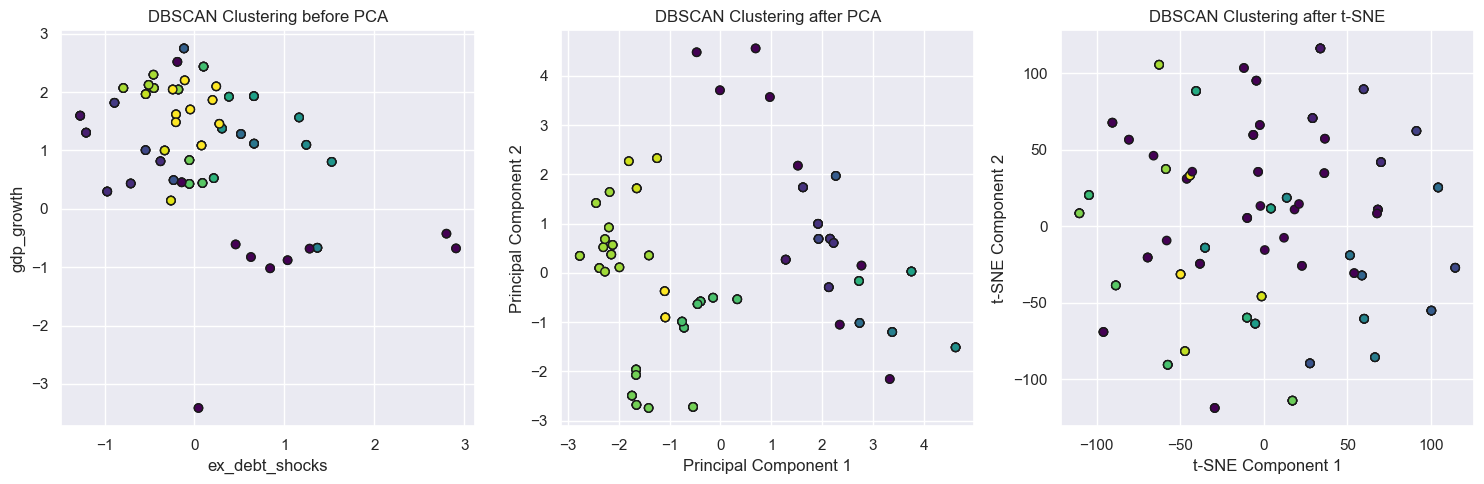

In [32]:
# Visualization
plt.figure(figsize=(15, 5))

# Before PCA
plt.subplot(1, 3, 1)
plt.scatter(x['ex_debt_shocks'], x['gdp_growth'], c=labels_optimal_dbscan, cmap='viridis', edgecolor='k')
plt.title('DBSCAN Clustering before PCA')
plt.xlabel('ex_debt_shocks')
plt.ylabel('gdp_growth')

# After PCA
plt.subplot(1, 3, 2)
plt.scatter(optimal_pca_kmeans1[:, 0], optimal_pca_kmeans1[:, 1], c=labels_optimal_dbscan_pca, cmap='viridis', edgecolor='k')
plt.title('DBSCAN Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# After t-SNE
plt.subplot(1, 3, 3)
plt.scatter(optima_tsne_kmeans2[:, 0], optima_tsne_kmeans2[:, 1], c=labels_optimal_dbscan_tsne, cmap='viridis', edgecolor='k')
plt.title('DBSCAN Clustering after t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()


If we try to look at the dataset, although the silhouette scores is more for TSNE, that can be in terms of silhouette scores but when you look at the datapoints visually, we see that t-SNE tends to scatter apart but PCA does a good job looking into the data points. 

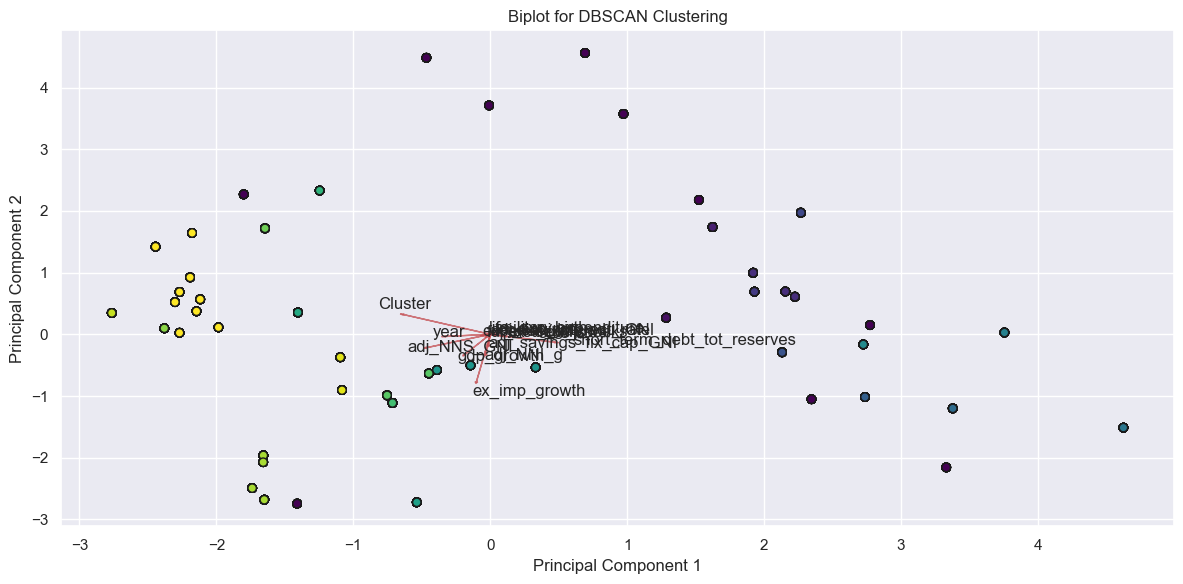

In [43]:
pca = PCA(n_components=6)
pca_features = pca.fit_transform(x)
dbscan_optimal = DBSCAN(eps=1.2, min_samples=4)
labels_optimal_dbscan = dbscan_optimal.fit_predict(x)
plt.figure(figsize=(12, 6))

# Biplot
for i, varnames in enumerate(x.columns):
    plt.scatter(pca_features[:, 0], pca_features[:, 1], c=labels_optimal_dbscan, cmap='viridis', edgecolor='k')
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.75, head_width=0.02)
    plt.text(pca.components_[0, i] * 1.3, pca.components_[1, i] * 1.3, varnames)

plt.title('Biplot for DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()



Here, we again see that 'Export Import Growth' is captured by PC1 more, but 'GDP growth' and 'Adjusted Net National Savings' are more towards PC2 and 'Debt Total Reserves' is more towards PC1 again.

## Hierarchial Clustering 

### Finding optimal clusters 

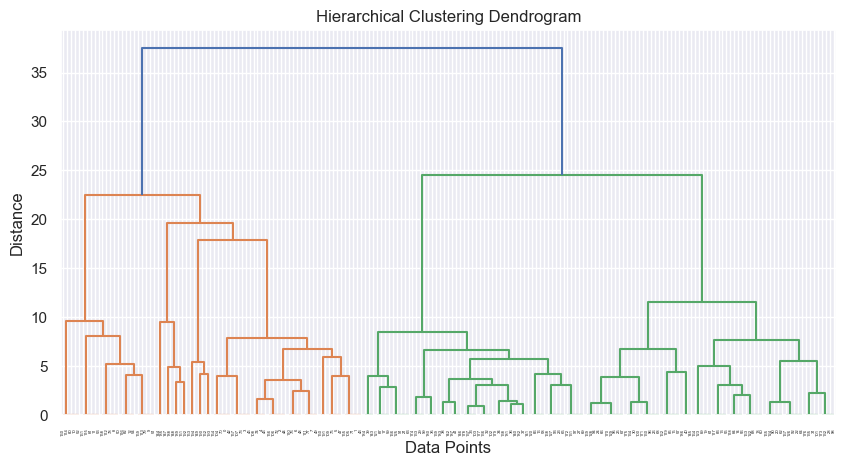

In [33]:
# for agglomerative clustering 

linkage_matrix = linkage(x, method='ward')
fig, ax = plt.subplots(figsize=(10, 5))

# Dendrogram 
dendrogram(linkage_matrix, ax=ax)
ax.set_title('Hierarchical Clustering Dendrogram')
ax.set_xlabel('Data Points')
ax.set_ylabel('Distance')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=3)


plt.show()

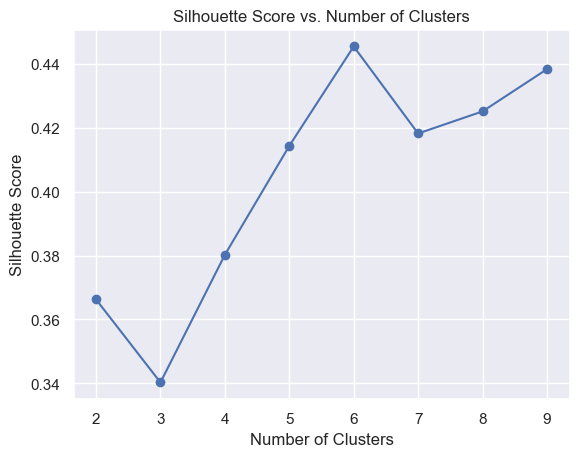

In [34]:

max_clusters = 9
silhouette_scores = []

for n_clusters in range(2, max_clusters + 1):
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agglomerative.fit_predict(x)
    silhouette_scores.append(silhouette_score(x, labels))

plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

We know that the agglomerative clusters is around 6, when the silhouette score is around 0.44. Now we try to do clustering on basis of before and after both the feature extraction methods of t-SNE and PCA. 

In [35]:

# Before PCA
hierarchial_optimal = AgglomerativeClustering(n_clusters=6)
labels_optimal_hierarcial = hierarchial_optimal.fit_predict(x)

# After PCA
pca2 = PCA(n_components=4)
optimal_pca_kmeans2 = pca2.fit_transform(x)

hierarchal_optimal_after_pca = AgglomerativeClustering(n_clusters=6)
labels_optimal_hierarchal_pca = hierarchal_optimal_after_pca.fit_predict(optimal_pca_kmeans2)

# After t-SNE
tsne2 = TSNE(n_components=3, perplexity=2, random_state=42)
optima_tsne_hierarchial = tsne.fit_transform(x)

hierarchal_optimal_after_tsne = AgglomerativeClustering(n_clusters=6)
labels_optimal_hierarchal_tsne = hierarchal_optimal_after_pca.fit_predict(optima_tsne_hierarchial)


In [36]:
# Silhouette scores
silhouette_score_before_pca1 = silhouette_score(x, labels_optimal_hierarcial)
print(f"Silhouette Score before PCA: {silhouette_score_before_pca:.4f}")

silhouette_score_after_pca1 = silhouette_score(optimal_pca_kmeans2, labels_optimal_hierarchal_pca)
print(f"Silhouette Score after PCA: {silhouette_score_after_pca:.4f}")

silhouette_score_after_tsne1 = silhouette_score(optima_tsne_hierarchial, labels_optimal_hierarchal_tsne)
print(f"Silhouette Score after TSNE: {silhouette_score_after_tsne:.4f}")


Silhouette Score before PCA: 0.5856
Silhouette Score after PCA: 0.5121
Silhouette Score after TSNE: 0.6255


Here again, we see that Silhouette Score after t-SNE performs better. We shall have to check it through visualization. 

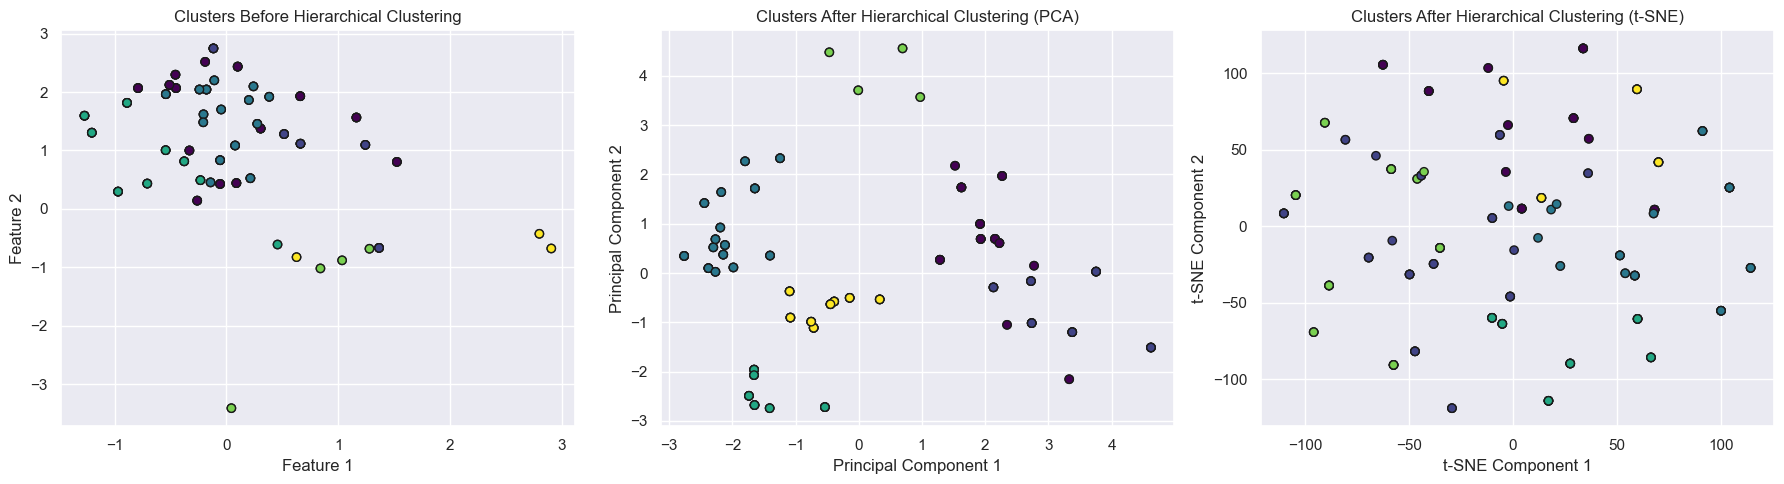

In [44]:

plt.figure(figsize=(18, 5))

# before hierarchial clustering
plt.subplot(1, 3, 1)
plt.scatter(x['ex_debt_shocks'], x['gdp_growth'], c=labels_optimal_hierarcial, cmap='viridis', edgecolor='k')
plt.title('Clusters Before Hierarchical Clustering')
plt.xlabel('External Debt Shocks')
plt.ylabel('GDP Growth')

# after hierarchial clustering with pca
plt.subplot(1, 3, 2)
plt.scatter(optimal_pca_kmeans2[:, 0], optimal_pca_kmeans2[:, 1], c=labels_optimal_hierarchal_pca, cmap='viridis', edgecolor='k')
plt.title('Clusters After Hierarchical Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# after hierarchial clustering with t-sNE
plt.subplot(1, 3, 3)
plt.scatter(optima_tsne_hierarchial[:, 0], optima_tsne_hierarchial[:, 1], c=labels_optimal_hierarchal_tsne, cmap='viridis', edgecolor='k')
plt.title('Clusters After Hierarchical Clustering (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()

When you look at hierarchial clustering, using the agglomerative clustering technique, we see that the silhouette score after t-SNE is better but visually PCA looks better. 

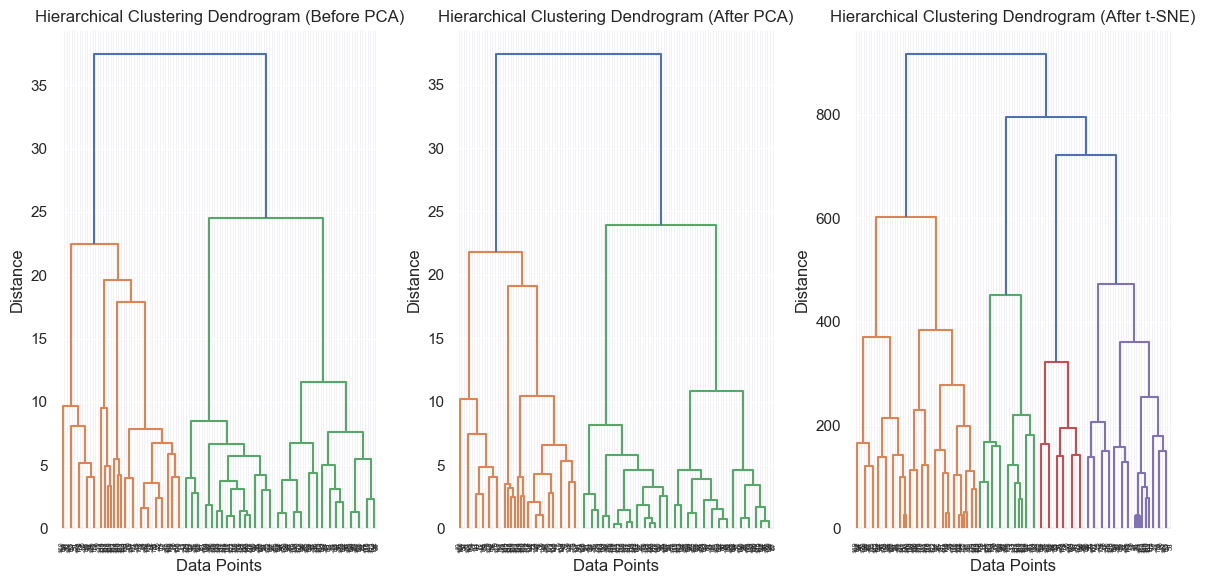

In [38]:

fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# before pca 
dendrogram(linkage(x, method='ward'), ax=axes[0])
axes[0].set_title('Hierarchical Clustering Dendrogram (Before PCA)')
axes[0].set_xlabel('Data Points')
axes[0].set_ylabel('Distance')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=3)

# after pca

dendrogram(linkage(optimal_pca_kmeans2, method='ward'), ax=axes[1])
axes[1].set_title('Hierarchical Clustering Dendrogram (After PCA)')
axes[1].set_xlabel('Data Points')
axes[1].set_ylabel('Distance')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=3)

# after tsne

dendrogram(linkage(optima_tsne_hierarchial, method='ward'), ax=axes[2])
axes[2].set_title('Hierarchical Clustering Dendrogram (After t-SNE)')
axes[2].set_xlabel('Data Points')
axes[2].set_ylabel('Distance')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=2)


plt.tight_layout()
plt.show()

# Results 

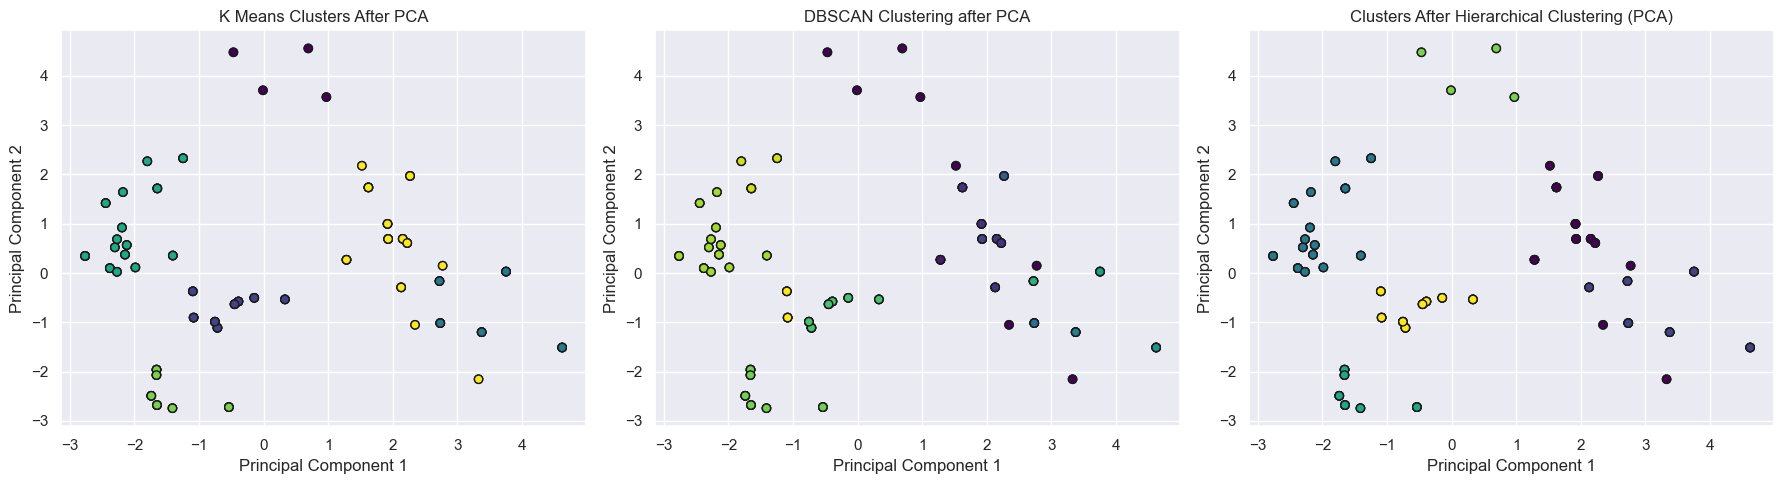

In [39]:


plt.figure(figsize=(18, 5))

# K Means
plt.subplot(1, 3, 1)
plt.scatter(optimal_pca_kmeans[:, 0], optimal_pca_kmeans[:, 1], c=labels_after_pca, cmap='viridis', edgecolor='k')
plt.title('K Means Clusters After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# DBSCAN
plt.subplot(1, 3, 2)
plt.scatter(optimal_pca_kmeans1[:, 0], optimal_pca_kmeans1[:, 1], c=labels_optimal_dbscan_pca, cmap='viridis', edgecolor='k')
plt.title('DBSCAN Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Hierarchial Clustering
plt.subplot(1, 3, 3)
plt.scatter(optimal_pca_kmeans2[:, 0], optimal_pca_kmeans2[:, 1], c=labels_optimal_hierarchal_pca, cmap='viridis', edgecolor='k')
plt.title('Clusters After Hierarchical Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


In summary, three clustering methods have been used. We used the K-Means clustering, DBSCAN clustering, and Hierarchial Clustering. Within the three clustering methods, I wanted to compare the performance of the clusters where PCA attempts to capture the linear aspects of the data and t-SNE tries to capture the non-linear aspects of the data. 

In terms of the K-means, the optimal silhoutte score was calculated through the Elbow and Silhouette method both have suggested an optimal cluster size of 6 and visualised using the scree plot. In addition to that, we also attempted to use a dimensionality reduction method of PCA and t-SNE on the optimal k means data. We used the optimal PCA and t-SNE values by finding on basis of the silhouette scores and perplexity values.
 
1. The results showed that for K-means
- Silhouette Score before PCA: 0.4454
- Silhouette Score after PCA: 0.4803
- Silhouette Score after TSNE: 0.2795

This means that K-means clustering in terms of the silhouette score performs better in terms of the K-means clustering after PCA. The visualisation part of it shows the same result. 

In terms of the DBSCAN clustering, a similar approach, you see the results where the optimal values are calculated on trying to find the silhouette score between the combinations of eps and min_samples values. 

2. The results showed that for DBSCAN

- Silhouette Score before PCA: 0.5285
- Silhouette Score after PCA: 0.5121
- Silhouette Score after TSNE: 0.5379

This means that Silhouette Score is better after t-SNE, one of the reasons I'd attribute to this is due to the fact that both DBSCAN and t-SNE cater to the non-linear and complex datasets and hence perform well together. However, you also see how there isn't much difference between the three. Visually, you see that the second one, with a combination of PCA and DBSCAN works better.

In terms of the Hierarchial Clustering, an attempt was made to cluster and to draw a dendogram. The optimal components were found using the dendogram or through calculating similarly on like how optimal clustering were calculated using the silhouette score. The results are similar to the dendogram. 

3. The results showed that for Hierarchial Clustering 

- Silhouette Score before PCA: 0.5856
- Silhouette Score after PCA: 0.5121
- Silhouette Score after TSNE: 0.6255

This means that Silhouette score is better after t-SNE but visually, the clustering after PCA seems better.

Keeping all these aside, although the discussion is quite direct and purely based-off on the information, we can also see that comparison of tsne and pca doesn't make sense since both use different methods. However, this helped me find which variables actually play more role than the others. 


# Conclusion 

In terms of the conclusion, I see a difference in terms of the how three clustering techniques, though DBSCAN and K-means use the Euclidean distance metric, it is interesting to see how they use two completely different basal points for their cluster consideration. Whilst K-Means focuses on partitioning the clusters on basis of the pre-defined k values, DBSCAN focuses on clustering on basis of the density of the data points. In accordance to the results above out of the three ways in which each clustering was done, I see that although Silhouette Score is least for K-means, it shows more exclusive clusters that are comparitively less overlapping than its counterparts. One of the ways in which I see it due to the difference in the sizes of the clusters, if you look at the graph above, for certain clusters, the size is 3 but for others it is 7. Another reason why it is suboptimal is due to the size of the sample. The questions asked should also have data with larger sample size. The problem with time series economics data is that although it is the closest to real-data, it is closest to capturing the disadvantages of the real life data too with the lack of cohesion, a huge amount of missing values due to which the sample size is limited. Hence, I conclude the though clustering algorithmns have different strengths and weaknesses, the visual inspection usually reveals the nuances about the aspects that the model would be unable to capture. 

In addition to that, it also suggests that for economic data, 6 clusters can be seen that suggests certain patterns and associations within the model range. The most interesting was for me to understand the the GDP and Export and Import Percentages. It is seen that although the clusters are mostly linear by itself, when the dimensionality reduction techniques were employed, with the two PCAs that explained the maximum variance, the clusters do show interesting patterns. This is interesting for BRICS nations being developing economics that certain fiscal and monetary parameters do contribute to economic growth. 


# References 

1. Clustering

- https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/

- https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/#:~:text=The%20value%20of%20the%20silhouette,near%200%20denote%20overlapping%20clusters.

- https://jfh.georgetown.domains/dsan5000/slides-and-labs/_site/content/slides/clustering/notes.html

1. K-Means Clustering 

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/

https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb#:~:text=The%20Silhouette%20Method,-The%20silhouette%20value&text=The%20range%20of%20the%20Silhouette,many%20or%20too%20few%20clusters.

- https://matplotlib.org/stable/api/markers_api.html
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


2. DBSCAN Clustering 

- https://github.com/sheebamoghal/customer_segmentation/blob/main/E-commerce_analytics.ipynb
- https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/
- https://www.datanovia.com/en/lessons/dbscan-density-based-clustering-essentials/
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html


3. Hierarchial Clustering 

- https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html
- https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

4. Silhouette Scores 


https://www.educative.io/answers/what-is-silhouette-score



1. Clustering

- Saji, B. (2021, January). In-depth Intuition of K-Means Clustering Algorithm in Machine Learning. https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/

- Banerji, A. (2021, May). Getting the Optimal Number of Clusters. https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/#:~:text=The%20value%20of%20the%20silhouette,near%200%20denote%20overlapping%20clusters.

- Hickman, J. (n.d.). Clustering. https://jfh.georgetown.domains/dsan5000/slides-and-labs/_site/content/slides/clustering/notes.html
- Mikhaylov, D. (2021, April 15). What Are PCA Loadings and Biplots? Towards Data Science. https://towardsdatascience.com/what-are-pca-loadings-and-biplots-9a7897f2e559

2. K-Means Clustering

- Scikit-Learn. (n.d.). KMeans. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

- Mahendru, K. (n.d.). How to Determine the Optimal K for K-Means. https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb#:~:text=The%20Silhouette%20Method,-The%20silhouette%20value&text=The%20range%20of%20the%20Silhouette,many%20or%20too%20few%20clusters.

- Matplotlib. (n.d.). Marker styles. https://matplotlib.org/stable/api/markers_api.html

- Scikit-Learn. (n.d.). PCA. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

1. DBSCAN Clustering

- Moghal, S. (n.d.). Customer Segmentation. https://github.com/sheebamoghal/customer_segmentation/blob/main/E-commerce_analytics.ipynb

- Sharma, A. (2020, September). How DBSCAN Clustering Works. https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/

- Datanovia. (n.d.). DBSCAN Density-Based Clustering Essentials. https://www.datanovia.com/en/lessons/dbscan-density-based-clustering-essentials/

- Scikit-Learn. (n.d.). DBSCAN. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

4. Hierarchical Clustering

- SciPy. (n.d.). scipy.cluster.hierarchy. https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

- SciPy. (n.d.). scipy.cluster.hierarchy.linkage. https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

- Scikit-Learn. (n.d.). AgglomerativeClustering. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

5. Silhouette Scores

- Educative. (n.d.). What is Silhouette Score? https://www.educative.io/answers/what-is-silhouette-score